In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import csv
import requests
import json
import gmaps

# Google developer API key
from config import gkey

# Configure gmaps
gmaps.configure(api_key=gkey)

In [2]:
# Files to Load
player_data_to_load = os.path.join("player_data_cleaned.csv")
seasons_data_to_load = os.path.join("Seasons_stats.csv")
# Inspect budget data from U.S. Department of Education 2010-2017 https://ope.ed.gov/athletics/#/datafile/list
#budgets_2009_data_to_load = os.path.join("budgets/","ope_ed_gov_schools_2008-2009.csv")
#budgets_2010_data_to_load = os.path.join("budgets/","ope_ed_gov_schools_2009-2010.csv")
#budgets_2011_data_to_load = os.path.join("budgets/","ope_ed_gov_schools_2010-2011.csv")
#budgets_2012_data_to_load = os.path.join("budgets/","ope_ed_gov_schools_2011-2012.csv")
#budgets_2013_data_to_load = os.path.join("budgets/","ope_ed_gov_schools_2012-2013.csv")
#budgets_2014_data_to_load = os.path.join("budgets/","ope_ed_gov_schools_2013-2014.csv")
#budgets_2015_data_to_load = os.path.join("budgets/","ope_ed_gov_schools_2014-2015.csv")
#budgets_2016_data_to_load = os.path.join("budgets/","ope_ed_gov_schools_2015-2016.csv")
#budgets_2017_data_to_load = os.path.join("budgets/","ope_ed_gov_schools_2016-2017.csv")
budgets_2010_data_to_load = os.path.join("budgets/","EADA2010.csv")
budgets_2011_data_to_load = os.path.join("budgets/","EADA2011.csv")
budgets_2012_data_to_load = os.path.join("budgets/","EADA2012.csv")
budgets_2013_data_to_load = os.path.join("budgets/","EADA2013.csv")
budgets_2014_data_to_load = os.path.join("budgets/","EADA2014.csv")
budgets_2015_data_to_load = os.path.join("budgets/","EADA2015.csv")
budgets_2016_data_to_load = os.path.join("budgets/","EADA2016.csv")
budgets_2017_data_to_load = os.path.join("budgets/","EADA2017.csv")


# Read the Player and Season Data
player_data_df = pd.read_csv(player_data_to_load, encoding="UTF-8")
seasons_data_df = pd.read_csv(seasons_data_to_load, encoding="UTF-8")

# Read the Budget Data From 2008-2017; reduce 4200+ columns to 17
budget2010_data_df = pd.read_csv(budgets_2010_data_to_load, encoding="UTF-8", usecols=[1, 4, 8, 10, 15, 26, 50, 143, 152, 158, 168, 316, 390, 427, 945, 3609, 3942])
budget2011_data_df = pd.read_csv(budgets_2011_data_to_load, encoding="UTF-8", usecols=[1, 4, 8, 10, 15, 26, 50, 143, 152, 158, 168, 316, 390, 427, 945, 3609, 3942])
budget2012_data_df = pd.read_csv(budgets_2012_data_to_load, encoding="UTF-8", usecols=[1, 4, 8, 10, 15, 26, 50, 143, 152, 158, 168, 316, 390, 427, 945, 3609, 3942])
budget2013_data_df = pd.read_csv(budgets_2013_data_to_load, encoding="UTF-8", usecols=[1, 4, 8, 10, 15, 26, 50, 143, 152, 158, 168, 316, 390, 427, 945, 3609, 3942])
budget2014_data_df = pd.read_csv(budgets_2014_data_to_load, encoding="UTF-8", usecols=[1, 4, 8, 10, 15, 26, 50, 143, 152, 158, 168, 316, 390, 427, 945, 3609, 3942])
budget2015_data_df = pd.read_csv(budgets_2015_data_to_load, encoding="UTF-8", usecols=[1, 4, 8, 10, 15, 26, 50, 143, 152, 158, 168, 316, 390, 427, 945, 3609, 3942])
budget2016_data_df = pd.read_csv(budgets_2016_data_to_load, encoding="UTF-8", usecols=[1, 4, 8, 10, 15, 26, 50, 143, 152, 158, 168, 316, 390, 427, 945, 3609, 3942])
budget2017_data_df = pd.read_csv(budgets_2017_data_to_load, encoding="UTF-8", usecols=[1, 4, 8, 10, 15, 26, 50, 143, 152, 158, 168, 316, 390, 427, 945, 3609, 3942])

#budget2009_data_df = pd.read_csv(budgets_2009_data_to_load, encoding="UTF-8", usecols=[1, 4, 8, 12, 16, 22, 23, 36, 37, 38, 39, 40, 45, 46, 47, 48, 49, 64, 65, 66, 67, 72, 73, 74, 75, 76, 81, 82, 83, 84, 85, 100, 101, 102, 103, 108, 109, 112, 114, 115, 117, 118, 120, 121, 123, 124, 126, 127]) 
#budget2010_data_df = pd.read_csv(budgets_2010_data_to_load, encoding="UTF-8", usecols=[1, 4, 8, 12, 16, 22, 23, 36, 37, 38, 39, 40, 45, 46, 47, 48, 49, 64, 65, 66, 67, 72, 73, 74, 75, 76, 81, 82, 83, 84, 85, 100, 101, 102, 103, 108, 109, 112, 114, 115, 117, 118, 120, 121, 123, 124, 126, 127]) 
#budget2011_data_df = pd.read_csv(budgets_2011_data_to_load, encoding="UTF-8", usecols=[1, 4, 8, 12, 16, 22, 23, 36, 37, 38, 39, 40, 45, 46, 47, 48, 49, 64, 65, 66, 67, 72, 73, 74, 75, 76, 81, 82, 83, 84, 85, 100, 101, 102, 103, 108, 109, 112, 114, 115, 117, 118, 120, 121, 123, 124, 126, 127]) 
#budget2012_data_df = pd.read_csv(budgets_2012_data_to_load, encoding="UTF-8", usecols=[1, 4, 8, 12, 16, 22, 23, 36, 37, 38, 39, 40, 45, 46, 47, 48, 49, 64, 65, 66, 67, 72, 73, 74, 75, 76, 81, 82, 83, 84, 85, 100, 101, 102, 103, 108, 109, 112, 114, 115, 117, 118, 120, 121, 123, 124, 126, 127]) 
#budget2013_data_df = pd.read_csv(budgets_2013_data_to_load, encoding="UTF-8", usecols=[1, 4, 8, 12, 16, 22, 23, 36, 37, 38, 39, 40, 45, 46, 47, 48, 49, 64, 65, 66, 67, 72, 73, 74, 75, 76, 81, 82, 83, 84, 85, 100, 101, 102, 103, 108, 109, 112, 114, 115, 117, 118, 120, 121, 123, 124, 126, 127]) 
#budget2014_data_df = pd.read_csv(budgets_2014_data_to_load, encoding="UTF-8", usecols=[1, 4, 8, 12, 16, 22, 23, 36, 37, 38, 39, 40, 45, 46, 47, 48, 49, 64, 65, 66, 67, 72, 73, 74, 75, 76, 81, 82, 83, 84, 85, 100, 101, 102, 103, 108, 109, 112, 114, 115, 117, 118, 120, 121, 123, 124, 126, 127]) 
#budget2015_data_df = pd.read_csv(budgets_2015_data_to_load, encoding="UTF-8", usecols=[1, 4, 8, 12, 16, 22, 23, 36, 37, 38, 39, 40, 45, 46, 47, 48, 49, 64, 65, 66, 67, 72, 73, 74, 75, 76, 81, 82, 83, 84, 85, 100, 101, 102, 103, 108, 109, 112, 114, 115, 117, 118, 120, 121, 123, 124, 126, 127])
#budget2016_data_df = pd.read_csv(budgets_2016_data_to_load, encoding="UTF-8", usecols=[1, 4, 8, 12, 16, 22, 23, 36, 37, 38, 39, 40, 45, 46, 47, 48, 49, 64, 65, 66, 67, 72, 73, 74, 75, 76, 81, 82, 83, 84, 85, 100, 101, 102, 103, 108, 109, 112, 114, 115, 117, 118, 120, 121, 123, 124, 126, 127])
#budget2017_data_df = pd.read_csv(budgets_2017_data_to_load, encoding="UTF-8", usecols=[1, 4, 8, 12, 16, 22, 23, 36, 37, 38, 39, 40, 45, 46, 47, 48, 49, 64, 65, 66, 67, 72, 73, 74, 75, 76, 81, 82, 83, 84, 85, 100, 101, 102, 103, 108, 109, 112, 114, 115, 117, 118, 120, 121, 123, 124, 126, 127])


# Display the data table for preview
budget2010_data_df.to_csv("budget2010_data_df.csv")
budget2011_data_df.to_csv("budget2011_data_df.csv")
budget2012_data_df.to_csv("budget2012_data_df.csv")
budget2013_data_df.to_csv("budget2013_data_df.csv")
budget2014_data_df.to_csv("budget2014_data_df.csv")
budget2015_data_df.to_csv("budget2015_data_df.csv")
budget2016_data_df.to_csv("budget2016_data_df.csv")
budget2017_data_df.to_csv("budget2017_data_df.csv")

#player_data_df.head()

In [3]:
#cleaned up
#University of California, Los Angeles	University of California-Los Angeles#
#University of North Carolina	University of North Carolina at Chapel Hill
#Indiana University	Indiana University-Bloomington
#St. John's University	St. John's University-New York
#University of Michigan	University of Michigan-Ann Arbor
#Ohio State University	Ohio State University-Main Campus
#North Carolina State University	North Carolina State University at Raleigh
#University of Minnesota	University of Minnesota-Twin Cities
#University of Maryland	University of Maryland-College Park
#Louisiana State University	Louisiana State University and Agricultural & Mechanical College
#Georgia Institute of Technology	Georgia Institute of Technology-Main Campus
#University of Nevada, Las Vegas	University of Nevada-Las Vegas

In [4]:
# Inspect budget data from U.S. Department of Education 2017 https://ope.ed.gov/athletics/#/datafile/list
budget2017_data_df.head()

,institution_name,city_txt,classification_name,EFMaleCount,STUDENTAID_MEN,HDCOACH_SALARY_MEN,IL_PARTIC_MEN,IL_REV_MEN,IL_EXP_MEN,IL_EXPENSE_MENALL,PARTIC_MEN_Bskball,SUM_PARTIC_MEN_Bskball,OPEXPPERPART_MEN_Bskball,OPEXPPERTEAM_MEN_Bskball,MEN_FTHEADCOACH_MALE_Bskball,REV_MEN_Bskball,EXP_MEN_Bskball
0,Alabama A & M University,Normal,NCAA Division I-FCS,1801,2085307.0,67604.0,226.0,946611.0,946611.0,946611,15.0,15.0,15111.0,226663.0,1.0,824939.0,824939.0
1,University of Alabama at Birmingham,Birmingham,NCAA Division I-FBS,3668,1745432.0,164067.0,95.0,3009310.0,3009065.0,3068488,13.0,13.0,56111.0,729441.0,1.0,3369190.0,3357016.0
2,University of Alabama in Huntsville,Huntsville,NCAA Division II without football,3023,1603935.0,67071.0,259.0,2989458.0,2989458.0,2989458,19.0,19.0,5687.0,108046.0,1.0,678342.0,678342.0
3,Alabama State University,Montgomery,NCAA Division I-FCS,1646,2123402.0,96711.0,251.0,1319095.0,1319095.0,1319095,16.0,16.0,5384.0,86146.0,1.0,815998.0,815998.0
4,The University of Alabama,Tuscaloosa,NCAA Division I-FBS,13038,8602048.0,2235296.0,362.0,2113599.0,10074583.0,10074583,15.0,15.0,122080.0,1831200.0,1.0,15003656.0,9681264.0


In [5]:
budget2017_data_df.count()

institution_name                2062
city_txt                        2061
classification_name             2062
EFMaleCount                     2062
STUDENTAID_MEN                  2047
HDCOACH_SALARY_MEN              2046
IL_PARTIC_MEN                   2059
IL_REV_MEN                      2025
IL_EXP_MEN                      2025
IL_EXPENSE_MENALL               2062
PARTIC_MEN_Bskball              1956
SUM_PARTIC_MEN_Bskball          1979
OPEXPPERPART_MEN_Bskball        1979
OPEXPPERTEAM_MEN_Bskball        1979
MEN_FTHEADCOACH_MALE_Bskball    1016
REV_MEN_Bskball                 1956
EXP_MEN_Bskball                 1956
dtype: int64

In [6]:
#Merge budget data in steps
#1 - all imported together in pairs
budget_data_merged_1 = pd.merge(budget2010_data_df, budget2011_data_df, on="institution_name", suffixes=['_2010','_2011'], how="left")
budget_data_merged_2 = pd.merge(budget2012_data_df, budget2013_data_df, on="institution_name", suffixes=['_2012','_2013'], how="left")
budget_data_merged_3 = pd.merge(budget2014_data_df, budget2015_data_df, on="institution_name", suffixes=['_2014','_2015'], how="left")
budget_data_merged_4 = pd.merge(budget2016_data_df, budget2017_data_df, on="institution_name", suffixes=['_2016','_2017'], how="left")

#2 - pairs merged agains
budget_data_merged_6 = pd.merge(budget_data_merged_1, budget_data_merged_2, on="institution_name", how="left")
budget_data_merged_7 = pd.merge(budget_data_merged_3, budget_data_merged_4, on="institution_name", how="left")

#3 - final merge
budget_data_merged_total = pd.merge(budget_data_merged_6, budget_data_merged_7, on="institution_name", how="left")

budget_data_merged_total.to_csv("budget_data_merged_total.csv")

In [7]:
# Add total columns for head coach salary, expenses, and revenues
budget_data_merged_total_summed = budget_data_merged_total.copy()
budget_data_merged_total_summed['Total_StudentAid'] = budget_data_merged_total['STUDENTAID_MEN_2010'] + budget_data_merged_total['STUDENTAID_MEN_2011'] + budget_data_merged_total['STUDENTAID_MEN_2012'] + budget_data_merged_total['STUDENTAID_MEN_2013'] + budget_data_merged_total['STUDENTAID_MEN_2014'] + budget_data_merged_total['STUDENTAID_MEN_2015'] + budget_data_merged_total['STUDENTAID_MEN_2016'] + budget_data_merged_total['STUDENTAID_MEN_2017']
budget_data_merged_total_summed['Total_HeadCoachSalary'] = budget_data_merged_total['HDCOACH_SALARY_MEN_2010'] + budget_data_merged_total['HDCOACH_SALARY_MEN_2011'] + budget_data_merged_total['HDCOACH_SALARY_MEN_2012'] + budget_data_merged_total['HDCOACH_SALARY_MEN_2013'] + budget_data_merged_total['HDCOACH_SALARY_MEN_2014'] + budget_data_merged_total['HDCOACH_SALARY_MEN_2015'] + budget_data_merged_total['HDCOACH_SALARY_MEN_2016'] + budget_data_merged_total['HDCOACH_SALARY_MEN_2017']
budget_data_merged_total_summed['Total_Revenue'] = budget_data_merged_total['REV_MEN_Bskball_2010'] + budget_data_merged_total['REV_MEN_Bskball_2011'] + budget_data_merged_total['REV_MEN_Bskball_2012'] + budget_data_merged_total['REV_MEN_Bskball_2013'] + budget_data_merged_total['REV_MEN_Bskball_2014'] + budget_data_merged_total['REV_MEN_Bskball_2015'] + budget_data_merged_total['EXP_MEN_Bskball_2016'] + budget_data_merged_total['EXP_MEN_Bskball_2017']
budget_data_merged_total_summed['Total_Expense'] = budget_data_merged_total['EXP_MEN_Bskball_2010'] + budget_data_merged_total['EXP_MEN_Bskball_2011'] + budget_data_merged_total['EXP_MEN_Bskball_2012'] + budget_data_merged_total['EXP_MEN_Bskball_2013'] + budget_data_merged_total['EXP_MEN_Bskball_2014'] + budget_data_merged_total['EXP_MEN_Bskball_2015'] + budget_data_merged_total['REV_MEN_Bskball_2016'] + budget_data_merged_total['REV_MEN_Bskball_2017']
budget_data_merged_total_summed.head()
budget_data_merged_total_summed.to_csv("budget_data_merged_total_summed.csv")

In [83]:
top25_df = budget_data_merged_total_summed[['institution_name','Total_HeadCoachSalary','Total_StudentAid','Total_Expense','Total_Revenue']].copy()
top25_df = top25_df.sort_values(by='Total_Expense', ascending=False)
top25_df = top25_df.reset_index(drop=True).head(25)
top25_df.head()

,institution_name,Total_HeadCoachSalary,Total_StudentAid,Total_Expense,Total_Revenue
0,University of Louisville,7718377.0,40726724.0,176300783.0,272985062.0
1,Duke University,6248265.0,75326839.0,156658579.0,205155916.0
2,University of Kentucky,8866796.0,45346350.0,144133449.0,166569620.0
3,Syracuse University,3758480.0,62676698.0,126942611.0,175512227.0
4,Indiana University-Bloomington,4089659.0,54543320.0,104947378.0,144558624.0


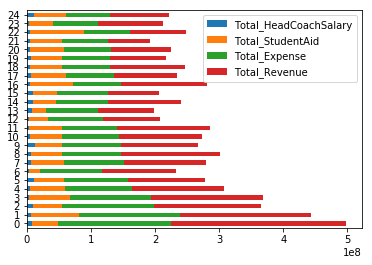

In [84]:
top25_df.plot.barh(stacked=True,alpha=0.5)
plt.show()

In [66]:
studentAid_df = budget_data_merged_total_summed[['Total_StudentAid','Total_Expense']].copy()
studentAid_df = studentAid_df.sort_values(by='Total_Expense', ascending=False)
studentAid_df = studentAid_df.reset_index(drop=True).head(25)
studentAid_df.head()

,Total_StudentAid,Total_Expense
0,40726724.0,176300783.0
1,75326839.0,156658579.0
2,45346350.0,144133449.0
3,62676698.0,126942611.0
4,54543320.0,104947378.0


(-0.25, 24.25)

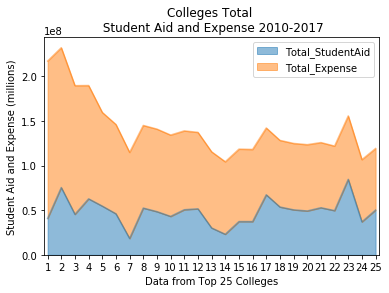

In [94]:
# plot
plot = studentAid_df.plot.area(alpha=0.5)
figAll = plot.get_figure()
plt.title("Colleges Total \n Student Aid and Expense 2010-2017")
plt.xlabel("Data from Top 25 Colleges")
plt.ylabel("Student Aid and Expense (millions)")
plt.xticks(range(len(studentAid_df.index + 1)),studentAid_df.index + 1)
#plt.ylim(0, 5.5)
plt.xlim(-.25, 24.25)

In [68]:
coachSalary_df = budget_data_merged_total_summed[['institution_name','Total_HeadCoachSalary','Total_Expense']].copy()
coachSalary_df = coachSalary_df.sort_values(by='Total_Expense', ascending=False)
coachSalary_df = coachSalary_df.reset_index(drop=True).head(25)
coachSalary_df.head()

,institution_name,Total_HeadCoachSalary,Total_Expense
0,University of Louisville,7718377.0,176300783.0
1,Duke University,6248265.0,156658579.0
2,University of Kentucky,8866796.0,144133449.0
3,Syracuse University,3758480.0,126942611.0
4,Indiana University-Bloomington,4089659.0,104947378.0


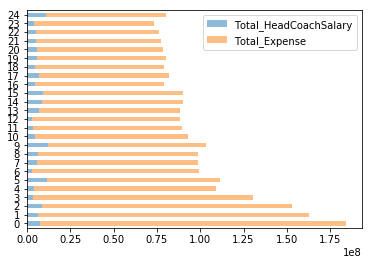

In [93]:
y_pos = np.arange(len(coachSalary_df['institution_name']))
salary = coachSalary_df['Total_HeadCoachSalary']
expense = coachSalary_df['Total_Expense']

coachSalary_df.plot.barh(stacked=True,alpha=0.5)
#plt.barh(y_pos,salary, color="red", stacked=True)
#plt.barh(y_pos,expense, color="blue", stacked=True)
plt.show()

(-0.25, 24.25)

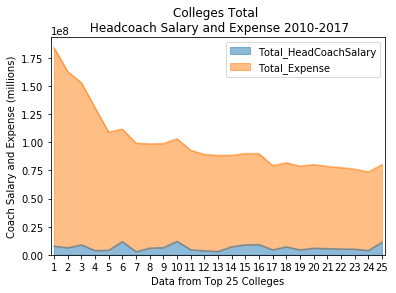

In [92]:
# plot
plot = coachSalary_df.plot.area(alpha=0.5)
figAll = plot.get_figure()
plt.title("Colleges Total \n Headcoach Salary and Expense 2010-2017")
plt.xlabel("Data from Top 25 Colleges")
plt.ylabel("Coach Salary and Expense (millions)")
plt.xticks(range(len(coachSalary_df.index + 1)),coachSalary_df.index + 1)
#plt.ylim(0, 5.5)
plt.xlim(-.25, 24.25)

In [39]:
revenue_df = budget_data_merged_total_summed[['institution_name','Total_Revenue','Total_Expense']].copy()
revenue_df = revenue_df.sort_values(by='Total_Expense', ascending=False)
revenue_df = revenue_df.reset_index(drop=True).head(25)
revenue_df.head()

,institution_name,Total_Revenue,Total_Expense
0,University of Louisville,272985062.0,176300783.0
1,Duke University,205155916.0,156658579.0
2,University of Kentucky,166569620.0,144133449.0
3,Syracuse University,175512227.0,126942611.0
4,Indiana University-Bloomington,144558624.0,104947378.0


In [60]:
revenue_df_noInst = revenue_df[['Total_Expense','Total_Revenue']].copy()
revenue_df_noInst.head()

,Total_Expense,Total_Revenue
0,176300783.0,272985062.0
1,156658579.0,205155916.0
2,144133449.0,166569620.0
3,126942611.0,175512227.0
4,104947378.0,144558624.0


(-0.25, 24.25)

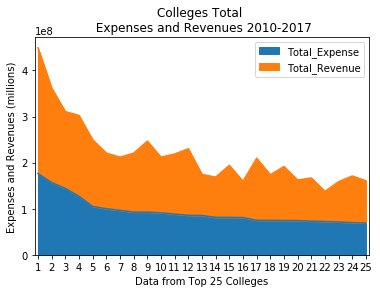

In [63]:
# plot
plot = revenue_df_noInst.plot.area()
figexpense = plot.get_figure()
plt.title("Colleges Total \n Expenses and Revenues 2010-2017")
plt.xlabel("Data from Top 25 Colleges")
plt.ylabel("Expenses and Revenues (millions)")
plt.xticks(range(len(revenue_df_noInst.index + 2)),revenue_df_noInst.index + 1)
#plt.ylim(0, 5.5)
plt.xlim(-.25, 24.25)

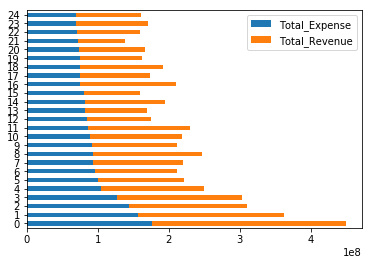

In [77]:
revenue_df_noInst.plot.barh(stacked=True)

In [79]:
maxExpense = revenue_df_noInst['Total_Expense'].max()
minExpense = revenue_df_noInst['Total_Expense'].min()
print(f"The max expense is {maxExpense} and the min is {minExpense}")

The max expense is 176300783.0 and the min is 68932648.0


(-0.25, 24.25)

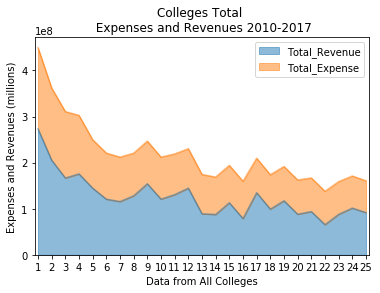

In [91]:
# plot
plot = top25revenue_df.plot.area(alpha=0.5)
figAll = plot.get_figure()
plt.title("Colleges Total \n Expenses and Revenues 2010-2017")
plt.xlabel("Data from All Colleges")
plt.ylabel("Expenses and Revenues (millions)")
plt.xticks(range(len(top25revenue_df.index + 1)),top25revenue_df.index + 1)
#plt.ylim(0, 5.5)
plt.xlim(-.25, 24.25)


In [80]:
combined_budget_2009_2017 = top25revenue_df['Total_Expense'].sum()
combined_revenue_2009_2017 = top25revenue_df['Total_Revenue'].sum()
print(f"The total basketball budget for the top 25 colleges from 2009-2017 is {combined_budget_2009_2017}. For the same time, the combined revenues is {combined_revenue_2009_2017}.")

The total basketball budget for the top 25 colleges from 2009-2017 is 2337108307.0. For the same time, the combined revenues is 3125375327.0.


In [41]:
#Gather variables
#Number of unique colleges
unique_college = player_data_df['college'].nunique()

#Group colleges to count players
playerGrouped = player_data_df.groupby('college').count()
countByCollege = player_data_df.groupby(['college'], as_index=False).agg({'name':'count'}).rename(columns={'name':'count'})

#singleCollege = countByCollege.groupby('count').size()
singleCollege = countByCollege.loc[countByCollege['count'] == 1]
singleCollege_sum = singleCollege['college'].count()

#College Mode
modeCollege_df = countByCollege['count'].sort_values(ascending=False)
modeCollege_df = modeCollege_df.reset_index(drop=True)
modeCollege = modeCollege_df.mode()
modeCollege = modeCollege.iloc[0]
modeCollege

#Earliest start year
minStartyear = player_data_df['year_start'].min()

#Latest start year
latestStartyear = player_data_df['year_start'].max()

#Number of unique players
unique_player = player_data_df['name'].nunique()

#Copy player dataframe
playerYears_df = player_data_df[['year_start','birth_date']].copy()

#Birth year
playerYears_df['birth_date'] = pd.to_datetime(playerYears_df['birth_date']).dt.year

playerYears_df.head()
playerYears_df['entryAge'] = playerYears_df['year_start'] - playerYears_df['birth_date']

averageStartage = playerYears_df['entryAge'].mean()
averageStartage = np.round(averageStartage, decimals=2)

#ageYeargroup = playerYears_df.groupby('year_start')
ageYeargroup = playerYears_df.groupby(['year_start'], as_index=False).agg({'entryAge':'mean'}).rename(columns={'entryAge':'AverAge'})

firstYearAverageAge = ageYeargroup.iloc[0]['AverAge']
firstYearAverageAge = np.round(firstYearAverageAge, decimals=2)

currentYearAverageAge = ageYeargroup.iloc[-1]['AverAge']
currentYearAverageAge = np.round(currentYearAverageAge, decimals=2)

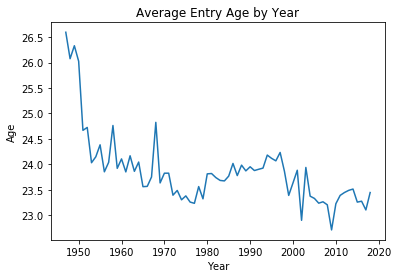

In [42]:
year_strt = ageYeargroup['year_start']
AverAge = ageYeargroup['AverAge']
plt.title("Average Entry Age by Year")
plt.xlabel("Year")
plt.ylabel("Age")

plt.plot(year_strt, AverAge)
fig1 = plt.gcf()
plt.show()

In [43]:
#plt.show()
#plt.draw()
fig1.savefig('average_age.png', dpi=100)
#plt.savefig('average_age.png', dpi=100)

In [44]:
playerGrouped = player_data_df.groupby('college').count()
countByCollege = player_data_df.groupby(['college'], as_index=False).agg({'name':'count'}).rename(columns={'name':'count'})
countByCollege.head()

,college,count
0,Acadia University,1
1,Alabama - Huntsville,1
2,Alabama A&M University,1
3,Alabama State University,2
4,Albany State University,5


In [45]:
top25colleges = countByCollege.sort_values(by = 'count', ascending=False).head(25)
top25colleges = top25colleges.reset_index(drop=True)
top25colleges.head()

,college,count
0,University of Kentucky,99
1,University of California-Los Angeles,91
2,University of North Carolina at Chapel Hill,87
3,University of Kansas,72
4,Duke University,71


<BarContainer object of 25 artists>

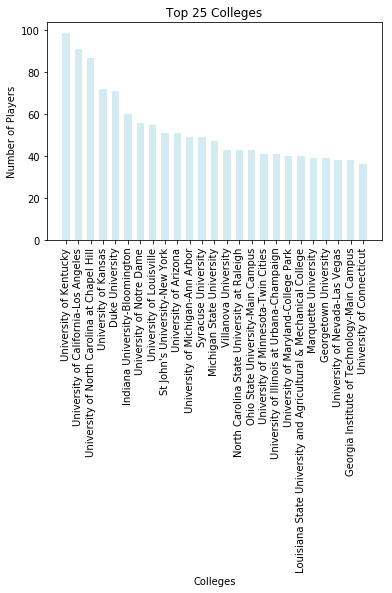

In [46]:
bar25colleges = top25colleges['college']
bar25count = top25colleges['count']
width = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120, 125]

plt.title("Top 25 Colleges")
plt.xlabel("Colleges")
plt.ylabel("Number of Players")
plt.xticks(rotation=90)
top25colleges['college']

fig2 = plt.gcf()
plt.xticks(width, bar25colleges)
plt.bar(width, bar25count, color='lightblue', alpha=0.5, align="center", width=3)

In [47]:
fig2.savefig('top25colleges.png', dpi=100)

In [ ]:
top25colleges["Lat"] = ""
top25colleges["Lng"] = ""
top25colleges

In [ ]:
# create a params dict that will be updated with new city each iteration
params2 = {"key": gkey}

# Loop through the cities_pd and run a lat/long search for each city
for index, row in top25colleges.iterrows():
    base_url = "https://maps.googleapis.com/maps/api/geocode/json"

    city = row['college']

    # update address key value
    params2['address'] = city

    # make request
    cities_lat_lng = requests.get(base_url, params=params2)
    
    # print the cities_lat_lng url, avoid doing for public github repos in order to avoid exposing key
    # print(cities_lat_lng.url)
    
    # convert to json
    cities_lat_lng = cities_lat_lng.json()

    top25colleges.loc[index, "Lat"] = cities_lat_lng["results"][0]["geometry"]["location"]["lat"]
    top25colleges.loc[index, "Lng"] = cities_lat_lng["results"][0]["geometry"]["location"]["lng"]

# Visualize to confirm lat lng appear
top25colleges

In [ ]:
top25colleges.to_csv("output-latlong-25.csv")

In [ ]:
# Store latitude and longitude in locations
locations = top25colleges[["Lat", "Lng"]]

# Fill NaN values and convert to float
count = top25colleges["count"].astype(float)

In [ ]:
# Plot Heatmap
fig = gmaps.figure()

# Create heat layer
heat_layer = gmaps.heatmap_layer(locations, weights=count, 
                                 dissipating=False, max_intensity=100,
                                 point_radius=1)


# Add layer
fig.add_layer(heat_layer)

# Display figure
fig

In [ ]:
print("The data consisted of two .csvs: one that had player data and one that had seasons.")
print(f"The player data had {unique_player} players that came from {unique_college} unique colleges. The NBA start years ranged from {minStartyear} to {latestStartyear}. The average age of the players entering the NBA over that time is {averageStartage}, though the average age has come down from {firstYearAverageAge} to {currentYearAverageAge} this year. One tidbit: the mode of the player count by college is {modeCollege}, which makes sense because {singleCollege_sum} of the colleges only sent one player to the NBA! ")